In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
#from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, RidgeCV
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics, tree
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
import math

In [30]:
boston_data=load_boston()
print(boston_data.keys())
print(boston_data.feature_names)
print(boston_data.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employ

In [3]:
#!pip install jupyterthemes
#!jt -t chesterish


In [31]:
boston = pd.DataFrame(data=boston_data.data, columns=boston_data.feature_names)
print(boston.head()) 
# The target column MEDV --> Median Value of owner-occupied homes is not present. so attaching the data from the target list.
boston['MEDV']= boston_data.target
boston.head()


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


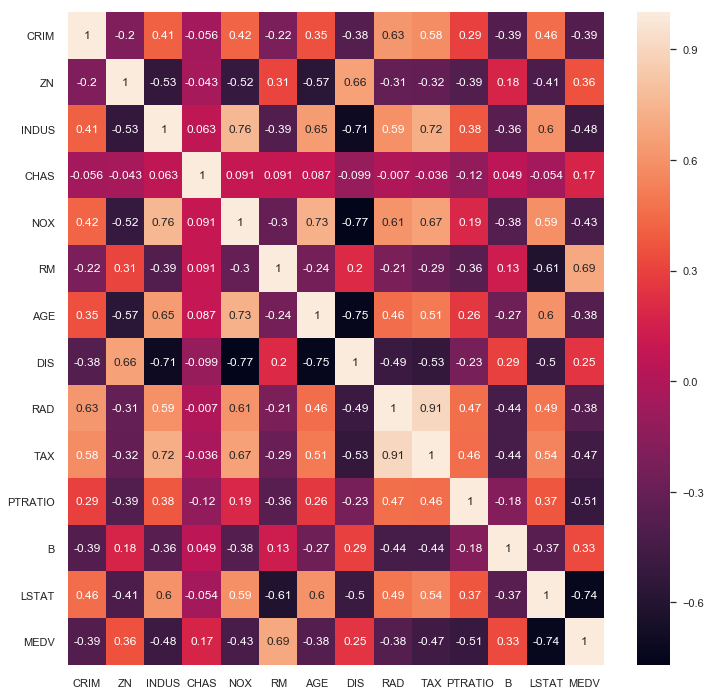

In [32]:
sns.set(rc={'figure.figsize':(12,12)})
correlation_mat = boston.corr().round(3)
sns.heatmap(data=correlation_mat, annot=True)

In [6]:
box_plot_columns =[i for i in boston.columns]

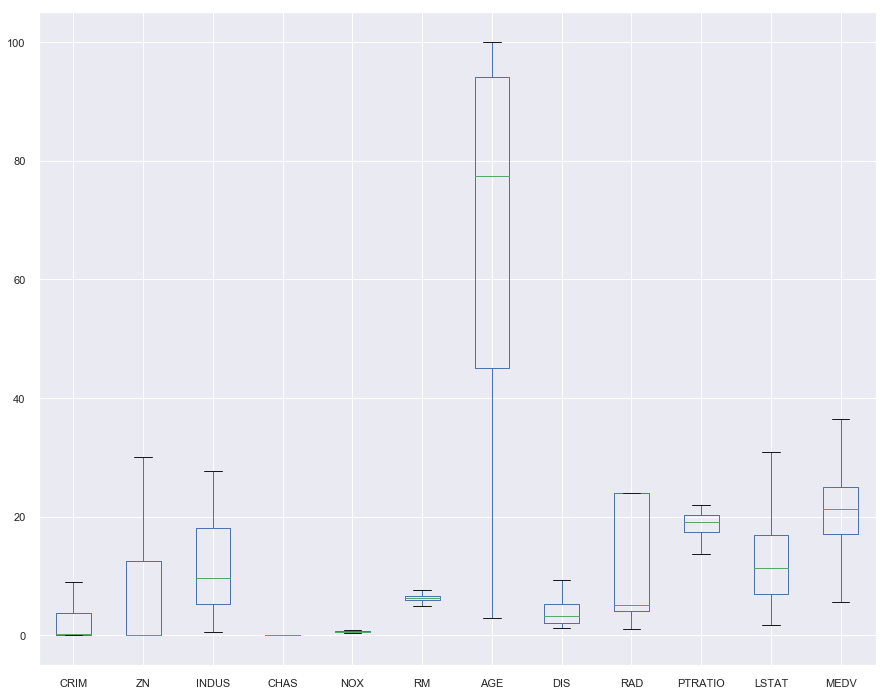

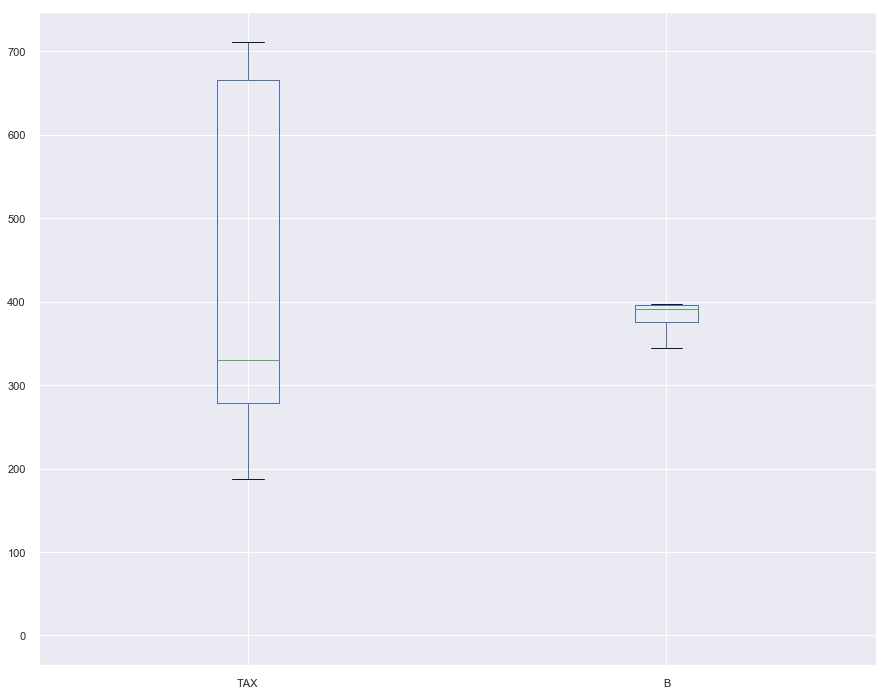

In [33]:
#plt.boxplot(box_plot_columns,notch='True',patch_artist=True,labels=['course1','course2','course3','course4'])
#plt.show()
sns.set(rc={'figure.figsize':(15,12)})
boston[boston.columns[~boston.columns.isin(['TAX', 'B'])]].plot.box()
boston[boston.columns[boston.columns.isin(['TAX', 'B'])]].plot.box()

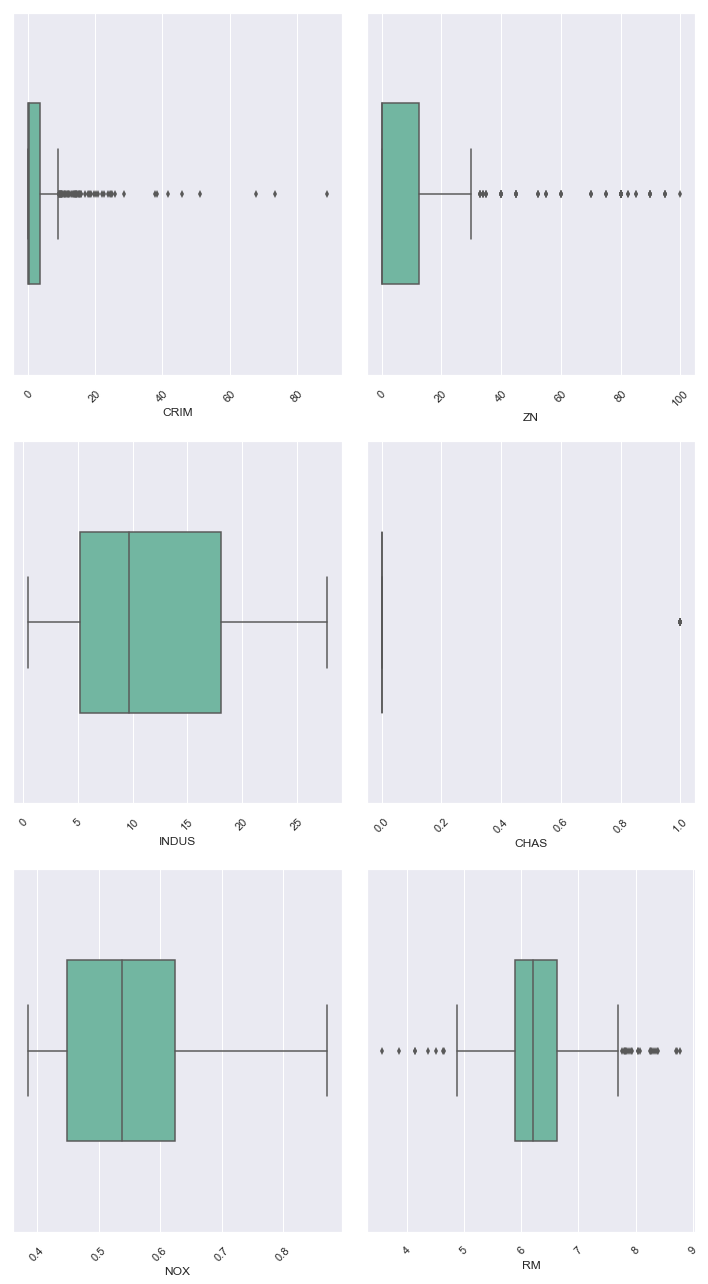

In [8]:
boxplots = boston[boston.columns[~boston.columns.isin(['TAX'])]]
cmap = sns.color_palette("Set2")

fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(10, 18))
a = [i for i in axes for i in i]
for i, ax in enumerate(a):
    sns.boxplot(x=boxplots.columns[i], data=boxplots, palette=cmap, width=0.5, ax=ax);

# rotate x-axis for every single plot
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

# set spacing for every subplot, else x-axis will be covered
plt.tight_layout()

In [34]:
#df[df.columns[~boston.columns.isin(['C','D'])]].head()
#boston.describe()
#boston.CHAS.unique()
print(boston[boston.CHAS==1].head())
print(boston[boston.CHAS==0].head())
print(boston[boston.CHAS==0].MEDV.mean())
print(boston[boston.CHAS==1].shape)
print(boston[boston.CHAS==0].shape)

        CRIM   ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
142  3.32105  0.0  19.58   1.0  0.871  5.403  100.0  1.3216  5.0  403.0   
152  1.12658  0.0  19.58   1.0  0.871  5.012   88.0  1.6102  5.0  403.0   
154  1.41385  0.0  19.58   1.0  0.871  6.129   96.0  1.7494  5.0  403.0   
155  3.53501  0.0  19.58   1.0  0.871  6.152   82.6  1.7455  5.0  403.0   
160  1.27346  0.0  19.58   1.0  0.605  6.250   92.6  1.7984  5.0  403.0   

     PTRATIO       B  LSTAT  MEDV  
142     14.7  396.90  26.82  13.4  
152     14.7  343.28  12.12  15.3  
154     14.7  321.02  15.12  17.0  
155     14.7   88.01  15.02  15.6  
160     14.7  338.92   5.50  27.0  
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.9

In [35]:
def frange(start, stop, step):
    i =start
    while i<stop:
        yield i
        i +=step

boston.CRIM.quantile([i for i in frange(0,1,0.1)])

0.0     0.006320
0.1     0.038195
0.2     0.064170
0.3     0.099245
0.4     0.150380
0.5     0.256510
0.6     0.550070
0.7     1.728440
0.8     5.581070
0.9    10.753000
1.0    88.976200
Name: CRIM, dtype: float64

Text(0,0.5,'Density')

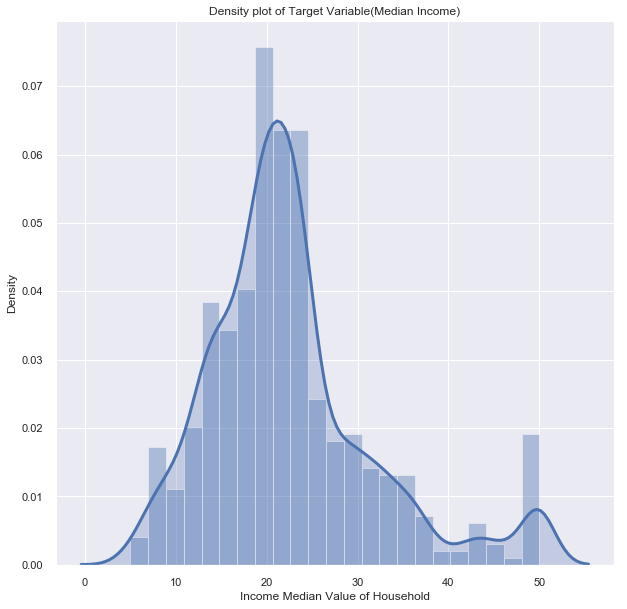

In [36]:
#sns.set(rc={'figure.figsize':(10,10)})
sns.set(rc={'figure.figsize':(10,10)})
sns.distplot(boston.MEDV, hist=True, kde=True, kde_kws = {'shade': True, 'linewidth': 3})
plt.title("Density plot of Target Variable(Median Income)")
plt.xlabel('Income Median Value of Household')
plt.ylabel('Density')

In [12]:
#print(scatter_matrix(boston, alpha=0.5, figsize=(15,15), grid=False, diagonal= 'kde', marker='.'))
#help(scatter_matrix)[;'/']

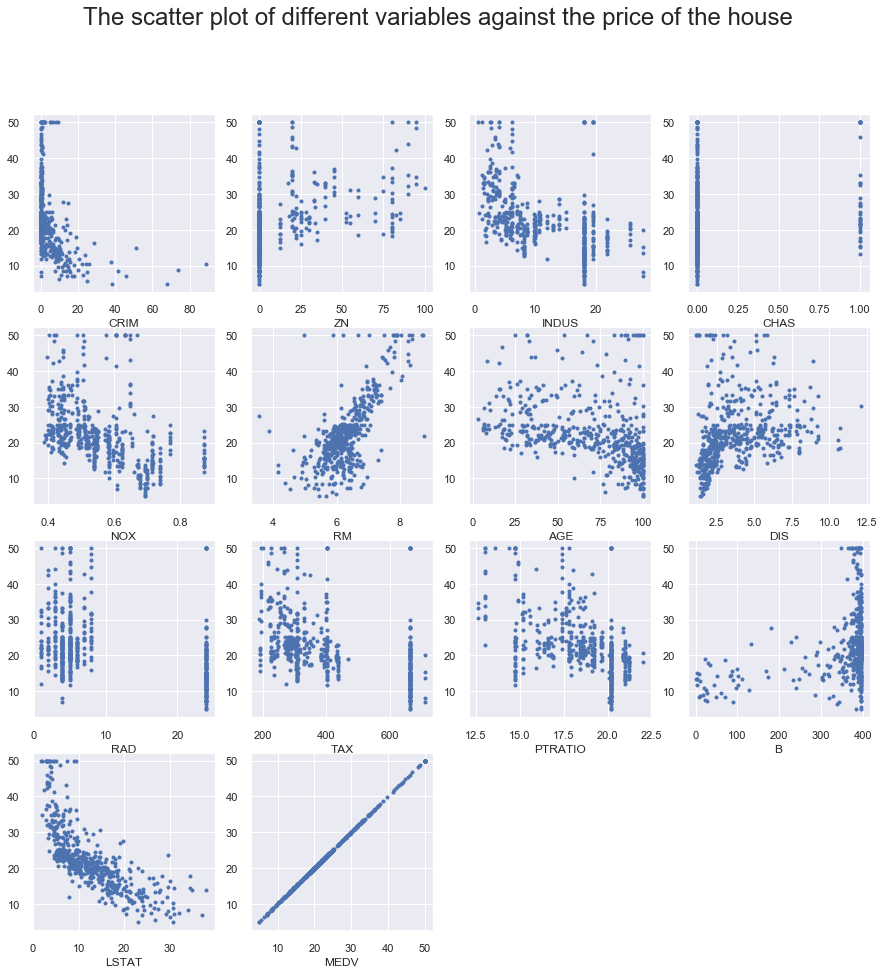

In [37]:
plt.figure(figsize=(15,15))

for i in range(len(boston.columns)):
    plt.subplot(4, 4,i+1)
    plt.scatter(boston.iloc[:,i],'MEDV', marker='.', data=boston)
    plt.xlabel(boston.columns[i])
    
plt.suptitle("The scatter plot of different variables against the price of the house", fontsize=24)
plt.show()


In [38]:
#help(plt.scatter)
boston["DIS"] = np.log(boston['DIS'])
#boston[]

In [15]:
# X_train, X_test, y_train, y_test = train_test_split(boston[boston.columns[~boston.columns.isin(['MEDV'])]], boston[boston.columns[boston.columns.isin(['MEDV'])]],test_size=0.2)
# clf = LinearRegression()
# clf.fit(X_train, y_train)
# predicted = clf.predict(X_test)
# expected = y_test

# plt.figure(figsize=(10, 10))
# plt.scatter(expected, predicted)
# plt.plot([0, 50], [0, 50], '--k')
# plt.axis('tight')
# plt.xlabel('True price ($1000s)')
# plt.ylabel('Predicted price ($1000s)')
# plt.tight_layout()



In [16]:
#help(train_test_split)
#print("RMS: %r " % np.sqrt(np.mean((predicted - expected) ** 2)))

In [17]:
# # Instantiate the linear model and visualizer
# ridge = Ridge()
# visualizer = ResidualsPlot(ridge)

# visualizer.fit(X_train, y_train)  # Fit the training data to the model
# visualizer.score(X_test, y_test)  # Evaluate the model on the test data
# visualizer.poof()                 # Draw/show/poof the data

In [39]:
l=list(boston.loc[:,boston.columns !='MEDV'].columns.values)
data_table_cols=['n_features','formula','feature_added','R_squared','AIC', 'Adj.R_Squared', 'BIC']
data_list=[]
data_table =pd.DataFrame(data_list,columns=data_table_cols)
data_table1=pd.DataFrame(data_list,columns=data_table_cols)
for n in range(1,len(boston.columns)):
        data_list=[]
        for i in l:
            if n==1:
                st1='MEDV ~ '+i
                model_quality=smf.ols(formula=st1,data=boston).fit()
                data_list.append([n,st1,i,round(model_quality.rsquared,3),round(model_quality.aic,0), round(model_quality.rsquared_adj,3), round(model_quality.bic,0)])
            else:
                st1=form+'+'+i
                model_quality=smf.ols(formula=st1,data=boston).fit()
                data_list.append([n,st1,i,round(model_quality.rsquared,3),round(model_quality.aic,0), round(model_quality.rsquared_adj,3), round(model_quality.bic,0)])
        data_table1=pd.DataFrame(data_list,columns=data_table_cols)
        a=str(data_table1.loc[data_table1['Adj.R_Squared'].idxmax()]['feature_added'])
        l.remove(a)
        if(n>1):
            d=data_table[data_table["n_features"]==n-1]
            k_aic=d.loc[d['Adj.R_Squared'].idxmax()]['AIC']
            d1=data_table1['AIC'].min()
            if (d1>k_aic):
                print("The best model is found with features: ",n-1)
                break
        form=str(data_table1.loc[data_table1['Adj.R_Squared'].idxmax()]['formula'])
        data_table=data_table.append(data_table1, ignore_index=True)
        #print(l)
        #n=1
        #print(n)
        n +=1

The best model is found with features:  11


In [40]:
print("The formula used for the optimal solution is:")
str(data_table.loc[data_table['Adj.R_Squared'].idxmax()]['formula'])


The formula used for the optimal solution is:


'MEDV ~ LSTAT+RM+PTRATIO+DIS+NOX+CHAS+CRIM+RAD+TAX+ZN+B'

In [41]:
print(data_table.loc[data_table['Adj.R_Squared'].idxmax()])

n_features                                                      11
formula          MEDV ~ LSTAT+RM+PTRATIO+DIS+NOX+CHAS+CRIM+RAD+...
feature_added                                                    B
R_squared                                                     0.76
AIC                                                           2982
Adj.R_Squared                                                0.755
BIC                                                           3033
Name: 87, dtype: object


In [42]:
std1=str(data_table.loc[data_table['Adj.R_Squared'].idxmax()]['formula'])
std1='MEDV ~ LSTAT+RM+PTRATIO+DIS+NOX+CHAS+CRIM+RAD+TAX+ZN+B'
model_quality1=smf.ols(formula=std1,data=boston).fit()
model_quality1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     142.2
Date:                Mon, 18 Feb 2019   Prob (F-statistic):          3.00e-145
Time:                        23:53:57   Log-Likelihood:                -1479.2
No. Observations:                 506   AIC:                             2982.
Df Residuals:                     494   BIC:                             3033.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.3304      5.125      9.040      0.000      36.260      56.401
LSTAT         -0.5471      0.046    -11.950      0.000      -0.637      -0.457
RM             3.8031      0.388      9.796      0.000       3.040       4.566
PTRATIO       -0.9393      0.124     -7.567      0.000      -1.183      -0.695
DIS           -8.0025      0.764    -10.470      0.000      -9.504      -6.501
NOX          -25.5364      3.638     -7.019      0.000     -32.684     -18.388
CHAS           2.6232      0.822      3.192      0.002       1.009       4.238
CRIM          -0.1490      0.032     -4.650      0.000      -0.212      -0.086
RAD            0.3433      0.061      5.598      0.000       0.223       0.464
TAX           -0.0149      0.003     -4.536      0.000      -0.021      -0.008
ZN             0.0376      0.012      3.109      0.002       0.014       0.061
B              0.0083      0.003      3.206      0.001       0.003       0.013
==============================================================================
Omnibus:                      115.549   Durbin-Watson:                   1.154
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              356.321
Skew:                           1.064   Prob(JB):                     4.23e-78
Kurtosis:                       6.518   Cond. No.                     1.57e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0,0.5,'Residuals')

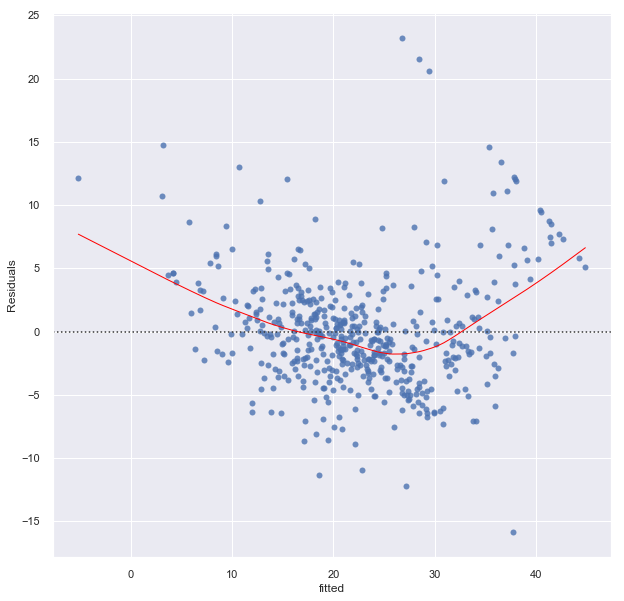

In [43]:
sns.residplot(x=model_quality1.fittedvalues, y=model_quality1.resid, data=boston, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.8}, 
line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel('fitted')
plt.ylabel('Residuals')

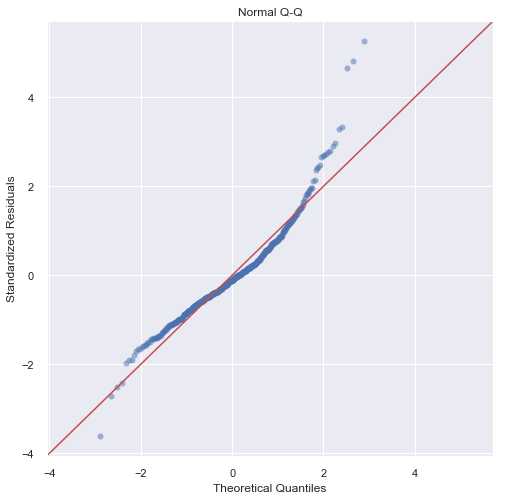

In [44]:
model_norm_residuals = model_quality1.get_influence().resid_studentized_internal
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(8)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');


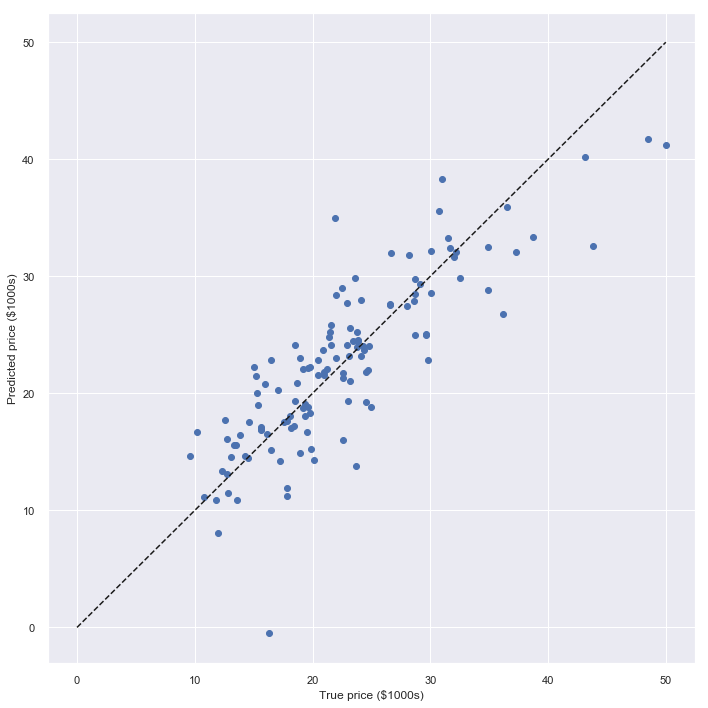

In [47]:
X_train, X_test, y_train, y_test = train_test_split(boston[boston.columns[boston.columns.isin(['LSTAT','RM','PTRATIO','DIS','NOX','CHAS','CRIM','RAD','TAX','ZN','B'])]], 
                                                    boston[boston.columns[boston.columns.isin(['MEDV'])]],test_size=0.25)
clf = LinearRegression()
model =clf.fit(X_train, y_train)
scores = cross_val_score(model, X_train, y_train, cv=4)

predicted = cross_val_predict(model, X_test, y_test, cv=4)
expected = y_test

plt.figure(figsize=(10, 10))
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()

In [48]:
print("The RMSE of the final model is given by:",round(np.sqrt(metrics.mean_squared_error(y_test, predicted)),2))
print("The test data model R-square is given by: ",round(metrics.r2_score(y_test, predicted),2))

The RMSE of the final model is given by: 4.2
The test data model R-square is given by:  0.7


In [46]:
lasso =LassoCV(cv=5)
model_lasso = lasso.fit(X_train,y_train)
predicted =model_lasso.predict(X_test)
print("The test data lasso model RMSE is given by: ",round(np.sqrt(metrics.mean_squared_error(y_test, predicted)),2))
print("The test data lasso model R-square is given by: ",round(metrics.r2_score(y_test, predicted),2))

#test_lasso_score =model_lasso.score(X_test, y_test)

#print("The testing data lasso is given by: ",test_lasso_score)
#print("linear regression ", model.score(X_test, y_test))


C:\Users\aniru\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The test data lasso model RMSE is given by:  6.2
The test data lasso model R-square is given by:  0.58


The below decision tree is drawn for samples


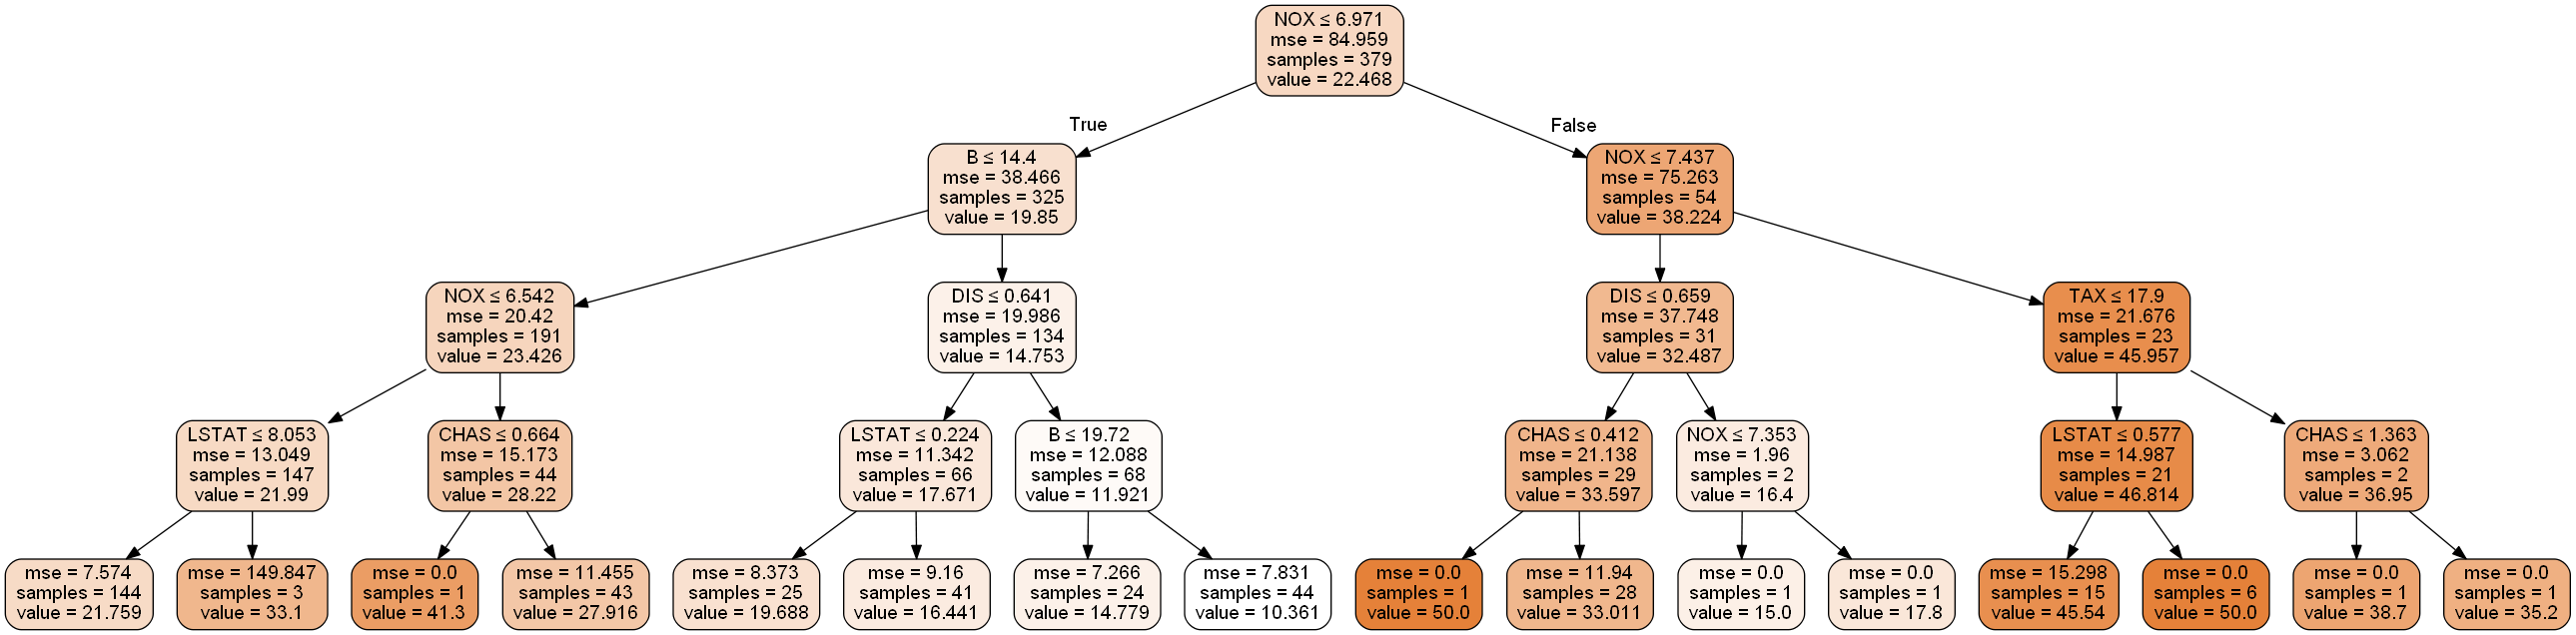

In [27]:
clf = tree.DecisionTreeRegressor(criterion ='mse',max_depth =4,random_state =12870943, max_features =7)
clf = clf.fit(X_train, y_train)

dot_data=tree.export_graphviz(clf,out_file=None,filled=True, rounded=True, special_characters=True, feature_names=['LSTAT','RM','PTRATIO','DIS','NOX','CHAS','CRIM','RAD','TAX','ZN','B'])

dot_data=tree.export_graphviz(clf,out_file=None, filled=True, rounded=True,special_characters=True,feature_names=['LSTAT','RM','PTRATIO','DIS','NOX','CHAS','CRIM','RAD','TAX','ZN','B'])
graph= pydotplus.graph_from_dot_data(dot_data)
print('The below decision tree is drawn for samples')
Image(graph.create_png())

In [28]:
#help(tree.DecisionTreeRegressor)
predicted = clf.predict(X_test)
print("The RMSE of the decision tree regression model is given by:",round(np.sqrt(metrics.mean_squared_error(y_test, predicted)),2))



The RMSE of the decision tree regression model is given by: 5.44
